# Woessmann - The Importance of School System

This notebook replicates results from

L. Woessmann (2016), The Importance of School Systems: Evidence from International Differences in Student Achievement.
Journal of Economic Perspectives—Volume 30, Number 3, Pages 3–32

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

## Introduction

Woessmann shows in his paper that differences in student achievement across countries are systematically related to differences in organisation and governance of school systems, such as external exit exams, autonomy of course and teacher choice. In other words, the way the school system is set up matters for student performance.


**Agenda of the paper:** 

* Woessmann first describes the size and cross-test consistency of international differences in student achievement,
* then uses an education production function to describe the relation of factors of (and beyond the) respective school system to achievement differences,
* and adds a discussion and conclusion.

In an education production function the output of education is modeled as a function of different inputs (e.g. Hanushek 1986, 2002). The author combines the input factors into three groups: family background factors, school resources, and institutional structures of school systems. While the first group is mostly outside the control
of school systems, the other two reflect the the setup of a country's school system: the quantity of resource inputs in its system and the institutional frame. The basic model is later extended to include interactions between input factors (proxies for autonomy and external exit exams). The education production function used by the author is given by:

$achievement_s = \alpha family + \beta resources + \gamma institutional$
    
where achievement is the student achievement by country, which is regressed on three collapsed aggregate country level variables: family background, school resources and institutional structures of the school system.

In this notebook, first the identification strategy is visualized and some critical issues adressed. Second, there is a short descriptive section to get a brief overview over the data used. Third, the replication of the paper follows. Last, I will have a look at the age effect.

## I. Visualization of the Identification Strategy & Issues

As outlined before, Woessmann tries to explain the variation of student test achievement with three factors: family, resources, and institutional structures.
![title](DAG_identification.png)

Each input factor, by itself, somehow influences student achievement: within school resources, there is the amount of money allocated to the respective schools, family background is fleshed out by a student family's immigration status or their neighbourhood. Institutional structures is determined by whether students face external exit exams, whether schools may hire autonomously and may choose their teachers' salary.

However, the picture is not as simple as shown above.
![title](DAG_discussion.png)


The author concesses, that inputs are not exogenous to the educational process. For example, there would be a reverse causation, if governments assigned additional resources to low-achieving schools, i.e. schools with many low-achieving students in the PISA tests.
**Need to add additional/different arrows**
There could also be a selection bias, if parents select schools based on what schools offer: thus, parents with high-achieving children might select different schools with specific resources than parents with low-achieving children. This bias would also be present if high-achieving schools were able to select their preferred (probably high-achieving) students.

Endogeneity through omitted variable bias could be present through country-level factors such as culture (thus valuation of achievement/education) that drives inputs, parents' preferences, and student effort.

To exclude any bias to do with expenditure per student and cultural preferences with regard to education, the author proposes to use changes in average country expenditure over time, as was done in a different paper (Gundlach, Woessmann, and Gmelin (2001)[**FOOTNOTE**]

![title](DAG_discussion2.png)
This is what I think should be added as well: dependency between school system and school resources and what I call test taking: students may differ in their maturity (e.g. take this test actually seriously and not just write anything) and also might differ in their test taking ability - and if that is low, they might choose not to take it even when selected to do so and rather e.g. play ill. In fact, on this motivational subject, countries differ immensely. While e.g. in Germany it is just another test, students in Korea and Taiwan get up together to sing the national anthem right before taking the test, which should greatly increase students' motivation to perform well.

Additionally, there are some issues with the construction and implementation of the PISA tests. Critics question the test's comparability for different resons (c.f **critics**). The test is based on multiple choice, where guessing as well as practicing this type of exercise can result in bias. Then, since the original exercises are mainly anglosaxon, there has been a problem of translation that results in different readability and length of explanatory texts, a varying number of clues to solve the problem at hand and what is called "curricular validity": test and curriculum do not necessarily correspond. Thus, some test-taking students might already have covered (and practiced) a large amount of exercises in their previous schooling, while others will face more difficulties solving the tests, having covered different areas of a subject. Additionally, some countries (e.g. USA) have more inclusive school systems (High School for everybody), while others (e.g. Germany) divide their students into different schools. PISA in Germany does not test the so-called "Förderschulen". This might cause bias due to selection, because students are NOT randomly chosen. [**FOOTNOTE/PROOF**]

## II. Data Analysis

After a discussion of various international tests, they select the OECD PISA test with data from 2003. PISA assesses "knowledge and skills essential for full participation in our modern society" (footnote) and draws a random sample of 15year-olds in a two-stage sampling. The dataset they work with relates school system to student achievement in 29 OECD countries.

The individual-level measures of family background are taken from student background questionnaires that students complete in the PISA study; the measures of school resources and institutions are mostly taken
from school background questionnaires that the principals of participating schools
complete; these measures are combined with country-level data on expenditure per
student and external exit exams that come from outside sources (for details, see
Appendix A of Woessmann et al. 2009)
books at home—a
proxy for aspects of educational, social, and economic background

As the author focuses on three groups of input factors: family background factors, institutional factors, and school resources, the next table is created to get a nice first look at the data.

In [105]:
# Read in the data and convert .dta file to .csv
data = pd.io.stata.read_stata('data/pisa2003_oecd_jep.dta')
data.to_csv('data/pisa2003_oecd_jep.csv')

# Create pandas Dataframe
df = pd.DataFrame(data=data)


# create new dataset with all the variables sorted into the higher order input factors
c_res = df[['expps', 'davailinstmat4', 'davailinstmat1', 'insttimemath', 'propcert', 'propqped']]
c_fam = df[['age', 'female', 'dstupreprim2', 'ageprim', 'repisced1', 'repisced2', 'dgrade7', 'dgrade8', 'dgrade9', 'dgrade11', 'dgrade12', 'dliveone', 'dlivepatch', 'dliveboth', 'dworkstat4', 'dworkstat3', 'dworkstat2', 'dworkstat1', 'dhsecateg3', 'dhsecateg2', 'dhsecateg1', 'dbook2', 'dbook3', 'dbook4', 'dbook5', 'dbook6', 'dimmig2', 'dimmig3', 'dstulanguage3', 'dstulanguage4','escs', 'dschoolloc23', 'dschoolloc4', 'dschoolloc5']]
c_ins = df[['cprivate', 'cschoolbudgetgov', 'mcentexa', 'purstudret', 'teacassprin', 'teacassextinsp', 'purcompave', 'purstudgrp', 'autstartsal', 'icautstartsal', 'autformbudget', 'icautformbudget', 'autcontent', 'icautcontent', 'authire', 'icauthire']]

df_overview = pd.concat([df['cnt'], df['pv1math'], c_res, c_fam, c_ins], axis =1, keys=['Country', 'test_score', 'School resources', 'Family Background', 'Institution'])
df_overview.head()

Country  test_score School resources                                \
      cnt     pv1math            expps davailinstmat4 davailinstmat1   
0     AUS  418.086914        59.264999            0.0            0.0   
1     AUS  446.985504        59.264999            0.0            0.0   
2     AUS  501.822693        59.264999            0.0            0.0   
3     AUS  506.807892        59.264999            0.0            0.0   
4     AUS  341.828888        59.264999            0.0            0.0   

                                 Family Background         ... Institution  \
  insttimemath propcert propqped               age female  ...  purcompave   
0          0.0      1.0     0.62             16.25      0  ...         0.0   
1        300.0      1.0     0.63             15.92      0  ...         0.0   
2        250.0      1.0     0.90             16.00      1  ...         0.0   
3        500.0      1.0     0.68             15.33      1  ...         0.0   
4        200.0      1.0     0.62             15.92      1  ...         0.0   

                                                                      \
  purstudgrp autstartsal icautstartsal autformbudget icautformbudget   
0        1.0         0.0           0.0           1.0           0.814   
1        1.0         0.0           0.0           1.0           0.814   
2        1.0         0.0           0.0           1.0           0.814   
3        1.0         0.0           0.0           1.0           0.814   
4        1.0         0.0           0.0           1.0           0.814   

                                             
  autcontent icautcontent authire icauthire  
0        1.0        0.814     0.0       0.0  
1        1.0        0.814     0.0       0.0  
2        1.0        0.814     0.0       0.0  
3        1.0        0.814     0.0       0.0  
4        1.0        0.814     0.0       0.0  

[5 rows x 58 columns]

Following the author, the table below shows the mean test scores per country, sorted from highest (Netherlands, with 542 points) to the lowest (Mexico, with 405 points). Germany is ranked 15th, just below Austria; USA is placed at rank 25. 

In [145]:
# Compute mean scores by country
df['pv1math'] = df['pv1math'].astype(float)
df_for_mean_scores_by_country = df[['cnt', 'pv1math']]
mean_scores = df_for_mean_scores_by_country.groupby('cnt').mean().sort_values('pv1math', ascending=False).copy()
mean_scores

,pv1math
cnt,
NLD,542.526922
FIN,542.508653
KOR,540.065957
CZE,534.831189
JPN,532.981523
BEL,532.974255
NZL,526.127360
AUS,522.398177
CAN,521.631896


Since averages convey limited information, the following plot shows test score distributions: of Japan, USA and, for reference, the distribution of all countries in the dataset together.

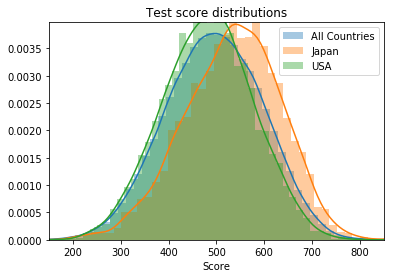

In [6]:
# plot individual country vs. the rest
df_for_mean_scores_by_country.set_index("cnt", inplace=True)
df_for_mean_scores_by_country.loc['DEU']

# create plot of test scores with Germany, USA, and all countries to compare the distributions
ax = sns.distplot(df['pv1math'], label='All Countries')
ax = sns.distplot(df_for_mean_scores_by_country.loc['JPN'], label='Japan')
ax = sns.distplot(df_for_mean_scores_by_country.loc['USA'], label='USA')
ax.set_xlim(150, 850)
ax.set_title('Test score distributions')
ax.set_xlabel('Score')
ax.legend();


The distribution of math test scores for all countries looks pretty normally distributed. 
Japan's distribution is, compared to the one for all countries, skewed to the right (with higher scores), while U.S. students' performance distribution is slightly skewed to the left - as the selected countries are number five from above and below, this nicely shows that neither country's mean score is due to drastic outliers to either side. Thus, differences in average test scores should be due not to e.g. a larger share of drastically low (high) performing students, but rather to differences in the setup of the educational system.

As this paper is titled "The Importance of School Systems", I want to do a rough comparison between institutional factors and test scores next.

,count,mean,std,min,25%,50%,75%,max
more_autonomy,,,,,,,,
0.0,123665.0,476.733301,102.498582,43.417999,404.845001,475.728302,548.559021,863.950806
1.0,96129.0,518.567019,93.347274,123.181198,454.696991,519.738281,584.078491,879.919006


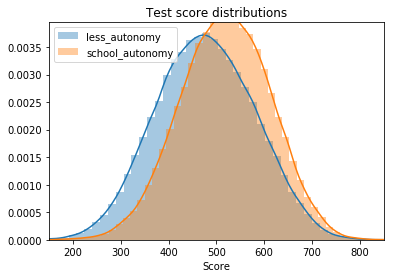

In [7]:
# Group the sample into those schools with more autonomy (may hire) and those with less.
may_hire = df['icauthire'] >= 0.5 

df['more_autonomy'] = np.nan
df.loc[~may_hire, 'more_autonomy'] = 0
df.loc[may_hire, 'more_autonomy'] = 1

# create table and plot for the distribution to compare the two groups
%matplotlib inline
ax = sns.distplot(df['pv1math'][~may_hire], label='less_autonomy')
ax = sns.distplot(df['pv1math'][may_hire], label='school_autonomy')
ax.set_xlim(150, 850)
ax.set_title('Test score distributions')
ax.set_xlabel('Score')
ax.legend();

df.groupby('more_autonomy')['pv1math'].describe()


There clearly is a difference in test scores between schools of the two groups. I chose the interaction term of external exit exams and a school's autonomy in hiring teachers as one of the possible institutional variables measuring a school's autonomy. As this is a continuous variable, the cutoff is at 0.5. Playing around with different cutoffs and different proxies of autonomy (one can also use e.g. the degree to which schools may choose their teachers' starting salary) does not significantly change the way the plot looks. 

## III. Replication

This is the reproduction of the three tables Woessmann shows in his paper. Table 2 is a country average of contribution of each of the three above described input factors. Table 3 contrasts the variance (r-squared) due to each of the input factors alone to its variance when the others are added to the model. Table 4 takes the country mean differences and sheds some light on how much is accounted for by the model and each of the three input factors.

### III.1 Table 2

The following table presents results from a weighted least-squares regression, where students’ sampling probability is used as weights and their PISA 2003 mathematics test score is the dependent variable. It provides an example of a basic cross-sectional estimation of the above introduced education production function on international level.

In [23]:
# Do a Weighted Least Squares Estimation
y=df['pv1math']
X=df[['age', 'female', 'dstupreprim2', 'ageprim', 'repisced1', 'repisced2', 'dgrade7', 'dgrade8', 'dgrade9', 'dgrade11', 'dgrade12', 'dliveone', 'dlivepatch', 'dliveboth', 'dworkstat4', 'dworkstat3', 'dworkstat2', 'dworkstat1', 'dhsecateg3', 'dhsecateg2', 'dhsecateg1', 'dbook2', 'dbook3', 'dbook4', 'dbook5', 'dbook6', 'dimmig2', 'dimmig3', 'dstulanguage3', 'dstulanguage4', 'escs', 'dschoolloc23', 'dschoolloc4', 'dschoolloc5', 'expps', 'davailinstmat4', 'davailinstmat1', 'insttimemath', 'propcert', 'propqped', 'cprivate', 'cschoolbudgetgov', 'mcentexa', 'purstudret', 'teacassprin', 'teacassextinsp', 'purcompave', 'purstudgrp', 'autstartsal', 'icautstartsal', 'autformbudget', 'icautformbudget', 'autcontent', 'icautcontent', 'authire', 'icauthire']]
X = sm.add_constant(X)

mod_wls = sm.WLS(y, X.astype(float), weights=df['newwgt'])
res_wls = mod_wls.fit()

# Make a table equivalent to table 2
list_of_entries = ['Constant', 'age', 'female', 'Preprimary education', 'School starting age', 'Grade repetition primary school', 'Grade repetition secondary school', '7th grade', '8th grade', '9th grade', '10th grade', '12th grade', 'Single parent', 'Patchwork family', 'Both parents', 'Both full time', 'One full, one half time', 'At least one full time', 'At least one half time', 'Blue collar, high skilled', 'White collar, low skilled', 'White collar, high skilled', '11-25', '26-100','101-200', '201-500', '>500', 'First generation', 'Nonnative', 'other national language/dialect', 'foreign language', 'Index:ESCS', 'Town', 'City', 'Large City', 'cum. educational expenditures per student', 'large shortage', 'no shortage', 'Instruction time', 'fully certified', 'tertiary degree pedagogy', 'Private operation (country share)', 'Government funding (country share)', 'External exit exams', 'Assessments for student retention/promotion', 'Monitoring lessons by principal', 'Monitoring by externa inspectors', 'Assessments to compare school','Assessments to group students', 'Autonomy in establishing starting salaries', 'External exit exams x Autonomy in starting salaries', 'Autonomy in formulating budget', 'Autonomy in determining course content', 'External exit exams x Autonomy course content', 'Autonomy in hiring teachers', 'External exit exams x Autonomy in hiring teachers']

print('\u2014'*80)
print('{:60s}{:>10s}'
      .format("", "Coef"))
print('\u2014'*80)
print('\u2014'*80)
print('{:60s}'.format("FAMILY BACKGROUND"), end="")
print(" "*110)
for i in range(1,7):
    print('{:60s}''{:{width}.{prec}f} ({:.{prec}f})'.format(list_of_entries[i], res_wls.params[i], res_wls.bse[i], width=10, prec=3))
print(" "*110)
print('{:60s}'.format("Grade"), end="")
print(" "*110)
for i in range(7,12):
    print('{:60s}''{:{width}.{prec}f} ({:.{prec}f})'.format(list_of_entries[i], res_wls.params[i], res_wls.bse[i], width=10, prec=3))
print(" "*110)
print('{:60s}'.format("Living with"), end="")
print(" "*110)
for i in range(12, 15):
    print('{:60s}''{:{width}.{prec}f} ({:.{prec}f})'.format(list_of_entries[i], res_wls.params[i], res_wls.bse[i], width=10, prec=3))
print(" "*110)
print('{:60s}'.format("Parents' working status"), end="")
print(" "*110)
for i in range(15,19):
    print('{:60s}''{:{width}.{prec}f} ({:.{prec}f})'.format(list_of_entries[i], res_wls.params[i], res_wls.bse[i], width=10, prec=3))
print(" "*110)
print('{:60s}'.format("Parents' job"), end="")
print(" "*110)
for i in range(19, 22):
    print('{:60s}''{:{width}.{prec}f} ({:.{prec}f})'.format(list_of_entries[i], res_wls.params[i], res_wls.bse[i], width=10, prec=3))
print(" "*110)
print('{:60s}'.format("Books at home"), end="")
print(" "*110)
for i in range(22,27):
    print('{:60s}''{:{width}.{prec}f} ({:.{prec}f})'.format(list_of_entries[i], res_wls.params[i], res_wls.bse[i], width=10, prec=3))
print(" "*110)
print('{:60s}'.format("Immigration background"), end="")
print(" "*110)
for i in range(27,29):
    print('{:60s}''{:{width}.{prec}f} ({:.{prec}f})'.format(list_of_entries[i], res_wls.params[i], res_wls.bse[i], width=10, prec=3))
print(" "*110)
print('{:60s}'.format("Language spoken at home"), end="")
print(" "*110)
for i in range(29,31):
    print('{:60s}''{:{width}.{prec}f} ({:.{prec}f})'.format(list_of_entries[i], res_wls.params[i], res_wls.bse[i], width=10, prec=3))
print(" "*110)
print('{:60s}''{:{width}.{prec}f} ({:.{prec}f})'.format(list_of_entries[31], res_wls.params[31], res_wls.bse[31], width=10, prec=3))
print(" "*110)
print('{:60s}'.format("Community location"), end="")
print(" "*110)
for i in range(32,35):
    print('{:60s}''{:{width}.{prec}f} ({:.{prec}f})'.format(list_of_entries[i], res_wls.params[i], res_wls.bse[i], width=10, prec=3))
print(" "*110)
print('{:60s}'.format("SCHOOL RESOURCES"), end="")
print(" "*110)
print('{:60s}''{:{width}.{prec}f} ({:.{prec}f})'.format(list_of_entries[35], res_wls.params[35], res_wls.bse[35], width=10, prec=3))
print('{:60s}'.format("Shortage of instructional materials"), end="")
print(" "*110)
for i in range(36,39):
    print('{:60s}''{:{width}.{prec}f} ({:.{prec}f})'.format(list_of_entries[i], res_wls.params[i], res_wls.bse[i], width=10, prec=3))
print(" "*110)
print('{:60s}'.format("Teacher education (share at school)"), end="")
print(" "*110)
for i in range(39,41):
    print('{:60s}''{:{width}.{prec}f} ({:.{prec}f})'.format(list_of_entries[i], res_wls.params[i], res_wls.bse[i], width=10, prec=3))
print(" "*110)
print('{:60s}'.format("INSTITUTIONS"), end="")
print(" "*110)
print('{:60s}'.format("Competition"), end="")
print(" "*110)
for i in range(41,43):
    print('{:60s}''{:{width}.{prec}f} ({:.{prec}f})'.format(list_of_entries[i], res_wls.params[i], res_wls.bse[i], width=10, prec=3))
print(" "*110)
print('{:60s}'.format("Accountability"), end="")
print(" "*110)
for i in range(43,49):
    print('{:60s}''{:{width}.{prec}f} ({:.{prec}f})'.format(list_of_entries[i], res_wls.params[i], res_wls.bse[i], width=10, prec=3))
print(" "*110)
print('{:60s}'.format("Autonomy and its interaction with external exit exams"), end="")
print(" "*110)
for i in range(49,56):
    print('{:60s}''{:{width}.{prec}f} ({:.{prec}f})'.format(list_of_entries[i], res_wls.params[i], res_wls.bse[i], width=10, prec=3))
print(" "*110)
print('{:60s}''{:{width}.{prec}f} ({:.{prec}f})'.format(list_of_entries[0], res_wls.params[0], res_wls.bse[0], width=10, prec=3))
print('\u2014'*80)
print('{:60s}''{:{width}}'.format('Students', df['pv1math'].count(), width=10, prec=3))
print('{:60s}''{:{width}}'.format('Schools', 8245, width=10))
print('{:60s}''{:{width}}'.format('Countries', 29, width=10))
print('{:60s}''{:{width}.{prec}f}'.format('R-squared (student level)', res_wls.rsquared, width=10, prec=3))


C:\Users\Eva\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


————————————————————————————————————————————————————————————————————————————————
                                                                  Coef
————————————————————————————————————————————————————————————————————————————————
————————————————————————————————————————————————————————————————————————————————
FAMILY BACKGROUND                                                                                                                                                         
age                                                             17.825 (0.659)
female                                                         -14.733 (0.351)
Preprimary education                                             6.832 (0.403)
School starting age                                             -3.869 (0.262)
Grade repetition primary school                                -54.579 (0.845)
Grade repetition secondary school                              -33.726 (0.921)
                                         

Robust standard errors adjusted for clustering at country level are written in parentheses next to the coefficient estimates. Descriptively, this model, as estimated here, accounts for 34 percent of the achievement in math test scores variance at the individual student level. It includes three groups of input factors (family background, school resources, institutions), again separated into different categories. 

There is a host of different student characteristics, family status, and cultural indicators, that contribute to student achievement. Age and participation in early childhood education contribute positively to student achievement, while gender has a very negative effect. 
Other highly significant estimates include a student's family status, parental working status, and the number of books available at home. This last one is used as a proxy for facets of educational, social, and economic background.

While cumulative educational expenditure per student has a relatively small, but significant effect on student achievement, quite intuitively shortage (or the lack of it) has an extensive effect. Assuming that schools with more resources in the tested grade will also have had more resources in earlier grades, the coefficient estimates on
resources capture not just the contemporaneous effect of resources (or the lack of it) in the specific grade, but its cumulative effect over all previous grades.

The institutional factors are partitioned into three: Competition, Accountability, and autonomy. Measures of private school operation, government funding, external exit exams, the use of assessments, and monitoring are positively correlated to students' math test scores. Interestingly, measures of school autonomy tend to be negatively related, unless coupled with external exit exams. When coupled, the estimates show a positive effect.

### III.2 Table 3


Table 3 answers the question to what extend each of the input factors: family background, school resources, and institutions account for differences in student achievement across countries. 
The student-level estimation calculated before is used to continue the analysis.

First, all the different variables for family background, school resources, and institutional system need to be collapsed into the three aggregated country level input factors. 

In order to do this, the authors used the student-level estimation on indiidual variables to combine those into one factor, e.g.

$family = \sum x_{i} * student \beta_{i}$

where x are the individual family background variables and the student $\beta$s are the respective coefficient estimates.
The three input factors are then collapsed to the level of the 29 OECD country observations to get three aggregate country level variables.



In [9]:
# Read in the dta file
data = pd.io.stata.read_stata('data/regression_output.dta')
data.to_csv('data/regression_output.csv')

# Create pandas Dataframe
df2 = pd.DataFrame(data=data)

# Regress the input factors alone and in all possible combinations
reg1 = smf.ols(formula = 'pv1math ~ fam + res + ins', data=df2).fit()
reg2 = smf.ols(formula = 'pv1math ~ fam', data=df2).fit()
reg3 = smf.ols(formula = 'pv1math ~ res', data=df2).fit()
reg4 = smf.ols(formula = 'pv1math ~ ins', data=df2).fit()
reg5 = smf.ols(formula = 'pv1math ~ res + ins', data=df2).fit()
reg6 = smf.ols(formula = 'pv1math ~ fam + ins', data=df2).fit()
reg7 = smf.ols(formula = 'pv1math ~ fam + res', data=df2).fit()

# Create list of R-squared
list_of_rsqrt = [reg2.rsquared, reg3.rsquared, reg4.rsquared, reg1.rsquared, reg5.rsquared, reg6.rsquared, reg7.rsquared]


# Make a table equivalent to Table 3
d = {'': ['Accounted variance single factor', 'Change in accounted variance when added'], 'Family Background': [reg2.rsquared, (reg1.rsquared-reg5.rsquared)], 'School Resources': [reg3.rsquared, (reg1.rsquared-reg6.rsquared)], 'Institutions': [reg4.rsquared, (reg1.rsquared-reg7.rsquared)], 'All Three':[reg1.rsquared, '']}
table3 = pd.DataFrame(data=d)
table3.set_index('')

,Family Background,School Resources,Institutions,All Three
,,,,
Accounted variance single factor,0.503979,0.180757,0.533338,0.834188
Change in accounted variance when added,0.207591,0.045016,0.258944,


The table above breaks the explained variable on the country-level down into components by each of the three higher-level input factors. Each factor's contribution naturally depends on the other factors added to the regression. 

While the contribution of School Resources is quite small (4 to 18%), the other two factors, Family Background factors and Institutions seem to play a quite important role in the total cros-country variance in student test scores with 21 to 50% and 26 to 53%, respectively. 

### III.3 Table 4

Table for shows how much the simple model accounts for country achievement in test scores: For each country, its difference from the international mean and how much each of the input factors can account for this difference is computed.

In [10]:
# Compute the mean 
variables = ['pv1math', 'ins', 'res', 'fam']

for item in variables:
    var_item = []
    for i in range(df2[item].count()):
        diff_i = df2[item].loc[i] - np.mean(df2[item].astype(float))
        var_item.append(diff_i)
    if item == 'pv1math':
        list1 = var_item
    if item == 'ins':
        list2 = var_item
    if item == 'res':
        list3 = var_item
    if item == 'fam':
        list4 = var_item

# Create a new Dataframe with the means and conduct a linear regression       
df_table4 = pd.DataFrame(
    {'pv1math': list1,
     'fam': list4,
     'res' : list3,
     'ins': list2
    })

reg_dev_mean = smf.ols(formula = 'pv1math ~ fam + res + ins', data=df_table4).fit()

#predict accounted difference from International mean
xb_resid = reg_dev_mean.predict()
xb_resid = pd.DataFrame(data=xb_resid)

# unaccounted difference
unacc_diff = df_table4['pv1math'] - xb_resid

# get the values for how much each input factor accounts for the 
#accounted difference per country
xb_fam = df_table4['fam'] *reg_dev_mean.params[1]
xb_fam_df = pd.DataFrame(data=xb_fam)
xb_res = df_table4['res'] *reg_dev_mean.params[2]
xb_res_df = pd.DataFrame(data=xb_res)
xb_ins = df_table4['ins'] *reg_dev_mean.params[3]
xb_ins_df = pd.DataFrame(data=xb_ins)

# Create new dataset in preparation
h = -(df_table4['pv1math'])
h_df = pd.DataFrame(data=h)

df5 = pd.concat([df2['cnt'], df_table4['pv1math'], xb_resid, unacc_diff[0], xb_fam_df, xb_res_df, xb_ins_df, h_df], axis =1)
df5.columns = ['Country', 'pv1math', 'xb', 'unacc_diff', 'fam', 'res', 'ins', 'h']
sorted_df5= df5.sort_values(by=['h'])
table4 = sorted_df5.drop(['h'], axis=1)
table4.columns =['Country', 'Observed Difference','Unaccounted difference', 'Accounted difference', 'Accounted for by Family background', 'Accounted for by School resources', 'Accounted for by Institutions']

table4 = table4.round(2)
table4.set_index('Country')



,Observed Difference,Unaccounted difference,Accounted difference,Accounted for by Family background,Accounted for by School resources,Accounted for by Institutions
Country,,,,,,
FIN,44.55,12.85,11.61,2.66,-1.27,11.46
KOR,42.00,27.72,-3.26,13.01,5.64,9.06
NLD,38.44,46.44,-21.98,-3.45,-0.26,50.14
JPN,34.02,29.62,-5.16,17.46,2.94,9.21
CAN,33.01,15.58,8.87,15.85,3.22,-3.49
BEL,29.46,41.27,-16.82,-1.17,1.44,41.01
CHE,26.47,-0.81,25.27,-13.16,9.45,2.90
AUS,24.46,22.38,2.07,14.01,6.64,1.74
NZL,24.46,6.70,17.76,16.15,-3.00,-6.45


For most countries the model performs quite well and the unaccounted-for residual achievement is smaller than 10% of a standard deviation. However, e.g. for Newzealand, Sweden only 6%, 4%, respectively, are accounted for by the model. Differences in school resources and institutions are negative for both countries.

For Korea, 27% of the relative high international achievement is accounted for by the model. Family background factors account for most, with 13%, while institutional factors range second with almost 10% and school resources third with 6%.
In the case of Netherlands, the model over-predicts its achievement, all due to is extremely high difference in institutions. Looking into the country, one can see it has the "largest share of privately operated schools, external exams, widespread course-content autonomy, and use of assessments for retention."[FOOTNOTE!!]


## IV The age effect

Original plan: do the analysis with PISA 2015 data failed, because data files are too big (https://oecd.org/pisa/data/).


One of the criticism PISA is facing, is the fact, that not only 15 year olds are tested. As the plot below shows, instead of testing *only* 15 year olds, some of the tested students are older. This is because, depending on the country, 15-year-olds, 15-year-olds in ninth grade, or ninth graders are tested. 


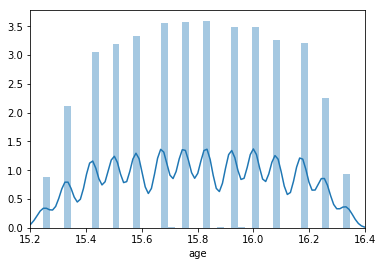

In [4]:
# Create plot for age distribution.
nonzero_entries = df['age'].where(df['age'] > 0).dropna()
ax = sns.distplot(nonzero_entries)
ax.set_xlim(15.2, 16.4)
plt.show()

Generally, one would assume that older students should score better in tests - be it because they spend more time in school, thus learned more, or because their ability to solve (certain) problems increases. To test this, in the following I will divide the sample into younger students (below 16) and those above and look at their mean test scores and test score distributions.

In [110]:
# Create Dataframe for the 16 year olds
df_above_16 = df.loc[lambda df: df.age >= 16, :].copy()
df_above_16.reset_index(inplace=True)

list_of_scores = []
list_of_sex = []
list_of_ages = []
list_of_countries = []

for i in range(len(df_above_16.index)):
    math_score = df_above_16['pv1math'].loc[i]
    list_of_scores.append(math_score)
    
    female = df_above_16['female'].loc[i]
    list_of_sex.append(female)
    
    age_above_16 = df_above_16['age'].loc[i]
    list_of_ages.append(age_above_16)
    
    country = df_above_16['cnt'].loc[i]
    list_of_countries.append(country)
    
df_16 = pd.DataFrame(
    {'Country': list_of_countries,
     'pv1math': list_of_scores,
     'female': list_of_sex,
     'age' : list_of_ages
    })

In [108]:
# Create Dataframe for 15 year olds
df_below_16 = df.loc[lambda df: df.age < 16, :].copy()
df_below_16.reset_index(inplace=True)

list_of_scores2 = []
list_of_sex2 = []
list_of_ages2 = []
list_of_countries2 = []

for i in range(len(df_below_16.index)):
    math_score = df_below_16['pv1math'].loc[i]
    list_of_scores2.append(math_score)
    
    female = df_below_16['female'].loc[i]
    list_of_sex2.append(female)
    
    age_below_16 = df_below_16['age'].loc[i]
    list_of_ages2.append(age_below_16)
    
    country2 = df_below_16['cnt'].loc[i]
    list_of_countries2.append(country2)
    
df_15 = pd.DataFrame(
    {'Country': list_of_countries2,
     'pv1math': list_of_scores2,
     'female': list_of_sex2,
     'age' : list_of_ages2
    })

In [109]:
print('Mean scores by sex for the 15 year olds')
df_below_16['pv1math'] = df_16['pv1math'].astype(float)
df_below_16.groupby('female')['pv1math'].describe().round(2)

Mean scores by sex for the 15 year olds


,count,mean,std,min,25%,50%,75%,max
female,,,,,,,,
0,36225.0,499.85,101.92,43.42,428.99,500.50,572.86,863.95
1,36178.0,499.08,101.75,120.84,428.60,500.26,571.85,843.70


In [111]:
print('Mean scores by sex for the 16 year olds')
df_above_16['pv1math'] = df_16['pv1math'].astype(float)
df_above_16.groupby('female')['pv1math'].describe().round(2)

Mean scores by sex for the 16 year olds


,count,mean,std,min,25%,50%,75%,max
female,,,,,,,,
0,36214.0,506.53,103.79,43.42,434.44,506.89,581.51,863.95
1,36189.0,492.40,99.34,94.91,423.46,493.96,563.36,833.34


There is a difference between the age groups - younger students performed less well than the older ones, though interestingly, in the younger group there is hardly any difference between boys and girls, while boys on average scored 14 points higher than girls in the older group.

,count,mean,std,min,25%,50%,75%,max
youngsters,,,,,,,,
0.0,53252.0,499.938768,101.765841,120.065399,429.537292,501.199585,572.160828,863.950806
1.0,166542.0,493.459989,100.386795,43.417999,424.240509,494.422791,564.527222,879.919006


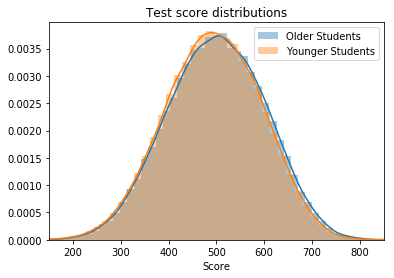

In [87]:
# print distribution of sixteen year olds vs. distribution of 15 year olds
younger_students = df['age'] <= 16 

df['youngsters'] = np.nan
df.loc[~younger_students, 'youngsters'] = 0
df.loc[younger_students, 'youngsters'] = 1

# create table and plot for the distribution to compare the two groups
%matplotlib inline
ax = sns.distplot(df['pv1math'][~younger_students], label='Older Students')
ax = sns.distplot(df['pv1math'][younger_students], label='Younger Students')
ax.set_xlim(150, 850)
ax.set_title('Test score distributions')
ax.set_xlabel('Score')
ax.legend();

df.groupby('youngsters')['pv1math'].describe()

The graph above plots the test score distribution of younger students (15 year olds) against that of sixteen year olds. There is a slight difference between the two; the distribution of older students is shifted slightly towards higher scores.

Next, I would like to look at the connection between a country's mean score and their total number of older students: Is their top performance (also) due to a greater number of older students?

In [158]:
# print total number of 16-year-olds in the sample (per country) compare that with the country mean: 
# high number of 16year olds -> high mean?
number_16_year_olds = []
list_of_countries = ['NLD', 'FIN', 'KOR', 'CZE', 'JPN', 'BEL', 'NZL', 'AUS', 'CAN', 'CHE','ISL', 'GBR', 'DNK', 'AUT', 'DEU', 'SWE', 'IRL', 'SVK', 'ITA', 'NOR', 'ESP', 'LUX', 'HUN', 'POL', 'USA', 'PRT', 'GRC','TUR', 'MEX']

for country in list_of_countries:
    sum_16_year_olds = 0
    df_new = df[df.cnt == country].copy()
    df_new.reset_index(inplace=True)
    for i in range(df_new['age'].count()):
        if df['age'].loc[i] >= 16:
            sum_16_year_olds += 1
    number_16_year_olds.append(sum_16_year_olds) 

mean_scores.reset_index(inplace=True)    
list_of_scores = [] 
for i in range(mean_scores['pv1math'].count()):
    value = mean_scores['pv1math'].loc[i]
    list_of_scores.append(value)
    
df_16_per_country = pd.DataFrame(
    {'Country': list_of_countries,
     'pv1math': list_of_scores,
     'number of 16 year olds' : number_16_year_olds
    })
df_16_per_country.set_index('Country')    

,pv1math,number of 16 year olds
Country,,
NLD,542.526922,1245
FIN,542.508653,1775
KOR,540.065957,1675
CZE,534.831189,1940
JPN,532.981523,1479
BEL,532.974255,2731
NZL,526.127360,1414
AUS,522.398177,3868
CAN,521.631896,9835


It seems that there is no directly visible connection between a country's mean test score and the number of sixteen year olds in the sample. Mexico, for example, has the highest number of older students (10.611), but scores lowest; Island has the lowest number of older students (1.040) and is ranked 11th and the Netherlands, ranked first tested 1.245 16 year olds.

Suppose there was an age effect: in a very simplified world students waking up on their 16th birthday would suddenly perform better in tests than before, i.e. the distribution of test scores of 16 year olds compared to that of 15 year-olds would be shifted to the right. In the estimation above, age is controlled for; I still do a simple simulation.
 
In what follows, I will do a simulation of the data for two groups: 15-year-olds and 16-year-olds, assuming that 16-year-olds have a test-score distribution that is shifted to higher scores. In a more realistic version, assume that with age the distribution of test scores slowly shifts towards higher scores.

In [20]:
import collections
# Establish the two groups
def student(age):
    """
    Assume students' intelligence increases linearly with age.
    """
    sigma = 100
    mu = 480 + 40*(age-15)
    
        
    return mu, sigma

def simulation(num_students, mw, sd):
    """
    This is the function that simulates the students' test scores.
    Arguments:
    - num_students: number of students
    - mw: mean age for the age distribution assumed to be normal
    - sd: std deviation for the age distribution
    
    Returns:
    - a dataframe
    """
    # initialize empty DataFrame
    info = {}
    info['age'] = np.float
    info['score'] = np.float
    
    df_sim = pd.DataFrame(columns=info.keys())
    
    for i in range(num_students):        
        # get age of an individual from a uniform distribution and the score from a normal distribution.
        age = 15 + np.random.normal(loc=mw, scale=sd)
            
        df_sim['age'].loc[i] = age
        

        score = np.random.normal(student(age))
        df_sim['score'].loc[i] = score[0]
            
    return df_sim
    
df_sim1 = simulation(200, 15.9, 0.5)
df_sim2 = simulation(200, 15.4, 0.5)

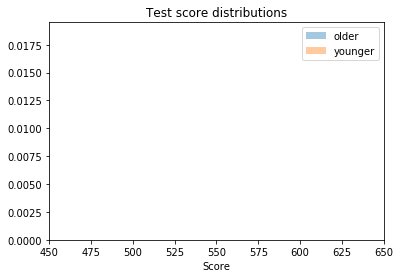

In [21]:
# create table and plot for the distribution to compare the two groups
%matplotlib inline
ax = sns.distplot(df_sim1['score'], label='older')
ax = sns.distplot(df_sim2['score'], label='younger')
ax.set_xlim(450, 650)
ax.set_title('Test score distributions')
ax.set_xlabel('Score')
ax.legend();



External Exit Exams have, in the weighted least sqares estimation, an estimated effect of 9.43 on student achievement. First I divide the sample into two groups: with treatment D= 1 (mcentexa = 1), and D=0 (mcentexa = 0). There are some countries in between: ...
Either I throw them out, or I put them into the treatment group. I could then estimate a Generalized Roy Model. 

In [ ]:
# What are the values for external exit exams?
df_for_mean_scores_by_country = df[['cnt', 'mcentexa']]
df_for_mean_scores_by_country.groupby('cnt').mean().round(2).sort_values('mcentexa', ascending=False)